<a href="https://colab.research.google.com/github/nagaraj2507/Dlithe_Internship/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#creating a dataframe
df = pd.read_csv('/content/insurance.csv') 

In [ ]:
#to print top 5 rows
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#to print bottom 5 rows
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
#to see description of whole dataset ,i.e., statistical details
df.describe() 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#to see summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#to check if there are any null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#from above we can say that there are no null values

In [ ]:
#to find unique number of children
df['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [ ]:
#printing shape
print(df.shape)

(1338, 7)


In [ ]:
#printing size
print(df.size)

9366


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


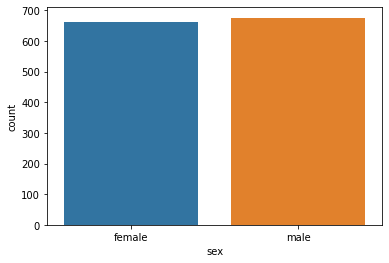

In [ ]:
#countplot of gender
sns.countplot('sex' , data = df)

In [ ]:
#converting string to number 
gender_dummies  = pd.get_dummies(df['sex'])
region_dummies = pd.get_dummies(df['region'])
smoker_dummies = pd.get_dummies(df['smoker'])

In [ ]:
#to add a 6 columns to original dataframe
df = pd.concat([df, gender_dummies], axis = 1)
df = pd.concat([df, region_dummies], axis = 1)
df = pd.concat([df, smoker_dummies], axis = 1)
df=df.rename(columns={'male':'Male','female':'Female'})
df.head()

,age,sex,bmi,children,smoker,region,charges,Female,Male,northeast,northwest,southeast,southwest,no,yes
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,0,0,1,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0,0,1,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0,0,1,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0,1,0,0,1,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0,1,0,0,1,0


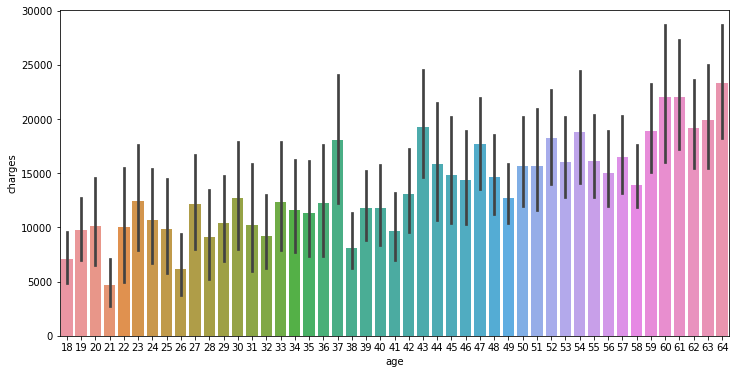

In [ ]:
#plot of age v/s charges 
plt.figure(figsize = (12,6))
sns.barplot(x = 'age', y = 'charges', data = df)

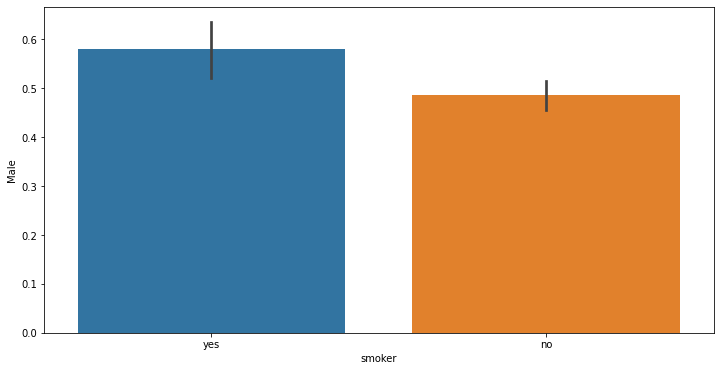

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'smoker', y = 'Male', data = df)

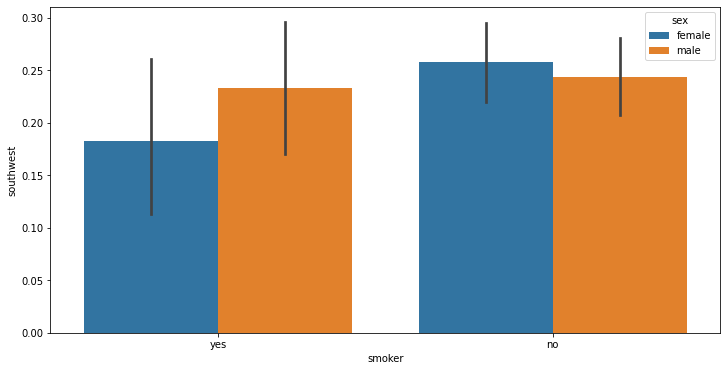

In [ ]:
#number of men and women smokers from southwest
plt.figure(figsize = (12,6))
sns.barplot(x = 'smoker', y = 'southwest',hue="sex", data = df)

In [ ]:
#to see total number of people in each place
region_df = pd.DataFrame(df['region'].value_counts())
region_df

,region
southeast,364
southwest,325
northwest,325
northeast,324


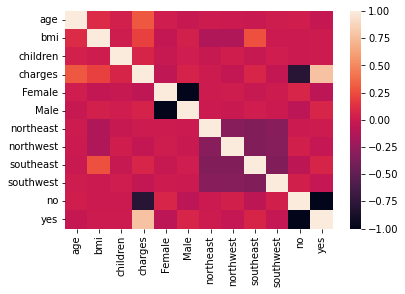

In [ ]:
#to find if there is any correlation between any columns
sns.heatmap(df.corr())

In [ ]:
#in above plot
#lighter the part more correlation
#darker the part less correlation

(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <a list of 10 Patch objects>)

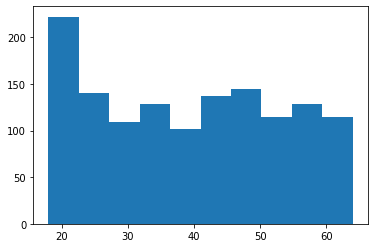

In [ ]:
#histogram for number of people in a particular age group
plt.hist(df.age)

In [ ]:
x=df.bmi.to_numpy()
y=df.charges.to_numpy()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


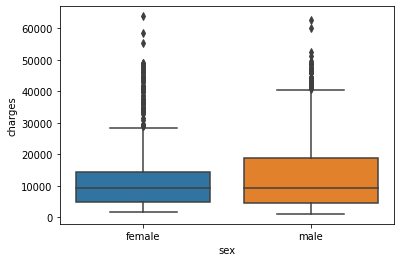

In [ ]:
sns.boxplot(df['sex'],df['charges'])

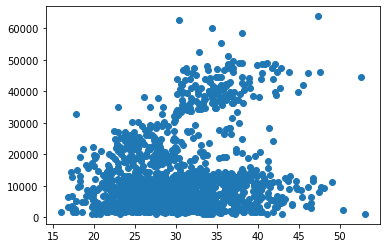

In [ ]:
plt.scatter(df['bmi'],df['charges'])

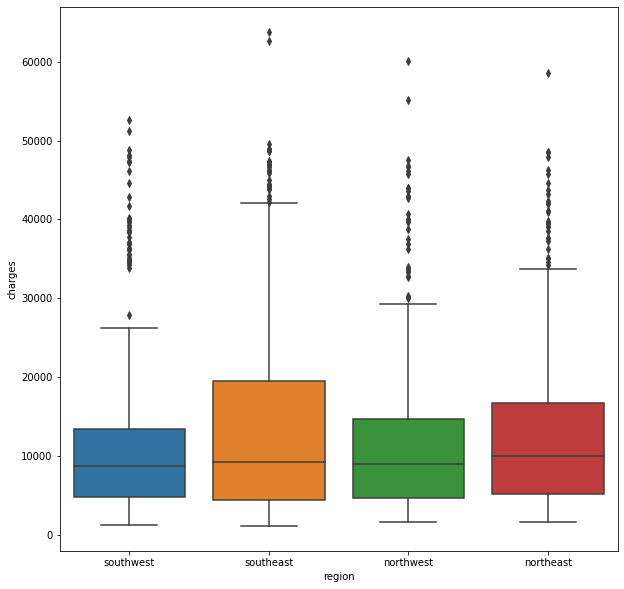

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x="region", y="charges")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0ee789050>,
      dtype=object)

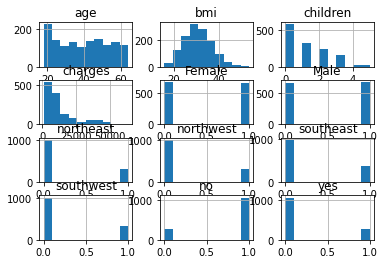

In [ ]:
df.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


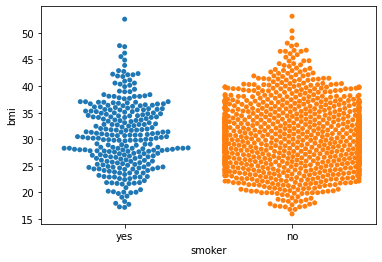

In [ ]:
sns.swarmplot(x ='smoker', y ='bmi', data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 46.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


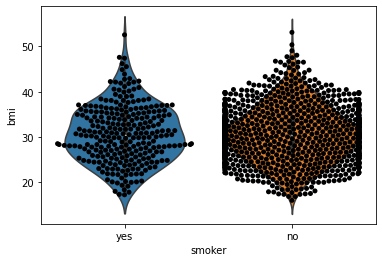

In [ ]:

sns.violinplot(x ='smoker', y ='bmi', data = df)
sns.swarmplot(x ='smoker', y ='bmi', data = df, color ='black')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


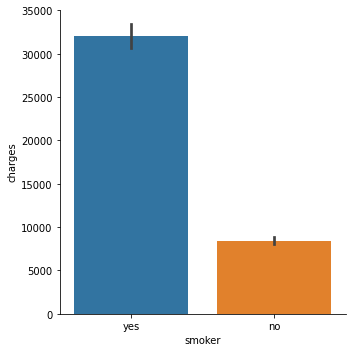

In [ ]:

sns.factorplot(x ='smoker', y ='charges', data = df, kind ='bar')